Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

Load data from CSV file

In [2]:
data = pd.read_csv('./data/2019_may2021_historical_detailed.csv')

Check initial rows of dataframe

In [3]:
data.head()

,submission_id,submission_score,submission_title,submission_link_flair_text,submission_selftext,reply_author,reply_body,reply_created_utc
0,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Mauri97,I'm getting a ton of bugs with 5 as well (snap...,1547656134
1,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,nathanwj,Goodnotes 5 is not yet compatible with the des...,1547658625
2,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Rowyfo,I haven't downloaded GN5 yet but watched a wal...,1547662874
3,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Mauri97,"That sounds a lot like what's going on, thanks!",1547663080
4,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,nongaussian,I will probably stick to GoodNotes 4 for a whi...,1547675267


See if there's any duplicated rows

In [4]:
data[data.duplicated()]

,submission_id,submission_score,submission_title,submission_link_flair_text,submission_selftext,reply_author,reply_body,reply_created_utc
52,agqksi,1,Text/typing in Goodnotes 5,NaN,"Notability user here, but trying out Goodnotes...",[deleted],[deleted],1622867780
70,agqksi,1,Text/typing in Goodnotes 5,NaN,"Notability user here, but trying out Goodnotes...",[deleted],[deleted],1622867780
319,byrrfc,1,Writing to text conversion?,Question - Other,Wondering if there is any other method of conv...,[deleted],[deleted],1622868300
386,co5jbl,1,Auto-scrolling not working?,NaN,"After just purchasing the app this morning, I'...",[deleted],[removed],1622868423
512,df5glb,1,Sub-Outlines ?,NaN,Hello!\n\nSo it’s been a while now and I still...,[deleted],[deleted],1622868582
...,...,...,...,...,...,...,...,...
6215,ncu1s1,1,Error E001-E,NaN,Has anyone ever encountered the Message GoodNo...,[deleted],[deleted],1622871407
6225,ncu1s1,1,Error E001-E,NaN,Has anyone ever encountered the Message GoodNo...,[deleted],[deleted],1622871407
6258,nd1d8u,1,Error E001-E,NaN,Has anyone ever encountered the Message GoodNo...,[deleted],[removed],1622871422
6267,nd1d8u,1,Error E001-E,NaN,Has anyone ever encountered the Message GoodNo...,[deleted],[removed],1622871422


Remove duplicated rows

In [5]:
data_dedup = data[~data.duplicated()]

In [6]:
data_dedup.shape

(6542, 8)

In [7]:
data_dedup[(data_dedup['reply_body'] == '[deleted]') | (data_dedup['reply_body'] == '[removed]')]

,submission_id,submission_score,submission_title,submission_link_flair_text,submission_selftext,reply_author,reply_body,reply_created_utc
51,agqksi,1,Text/typing in Goodnotes 5,NaN,"Notability user here, but trying out Goodnotes...",[deleted],[deleted],1622867780
54,agqksi,1,Text/typing in Goodnotes 5,NaN,"Notability user here, but trying out Goodnotes...",[deleted],[removed],1622867780
115,ak2id7,1,Are they going to fix GN5?,NaN,I am a grad student that exclusively takes not...,[deleted],[removed],1548524731
189,b0ckc6,2,GN5 Storyboard template,NaN,"New to GN, is there a storyboard template? I ...",[deleted],[removed],1622867900
212,b0ckc6,2,GN5 Storyboard template,NaN,"New to GN, is there a storyboard template? I ...",[deleted],[removed],1622867899
...,...,...,...,...,...,...,...,...
6375,nhbaag,1,More colors from me in the new realistic guide...,NaN,NaN,[deleted],[removed],1621766349
6377,nkk5zi,1,i’m fairly new to houseplants so i decided to ...,NaN,NaN,[deleted],[deleted],1621935849
6380,nkkdtd,1,Good Notes meta data PROBLEM pls HELP out,NaN,[removed],[deleted],[removed],1622871488
6395,nkkdtd,1,Good Notes meta data PROBLEM pls HELP out,NaN,[removed],[deleted],[deleted],1622871488


Remove rows where the reply body is `[deleted]` or `[removed]`

In [8]:
data_clean = data_dedup[~((data_dedup['reply_body'] == '[deleted]') | (data_dedup['reply_body'] == '[removed]'))]

In [9]:
data_clean.shape

(6323, 8)

In [10]:
data_clean.head()

,submission_id,submission_score,submission_title,submission_link_flair_text,submission_selftext,reply_author,reply_body,reply_created_utc
0,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Mauri97,I'm getting a ton of bugs with 5 as well (snap...,1547656134
1,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,nathanwj,Goodnotes 5 is not yet compatible with the des...,1547658625
2,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Rowyfo,I haven't downloaded GN5 yet but watched a wal...,1547662874
3,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,Mauri97,"That sounds a lot like what's going on, thanks!",1547663080
4,aglcrj,1,Goodnotes 4 vs. Goodnotes 5 right now,NaN,I have used Goodnotes 4 for work a ton. And I...,nongaussian,I will probably stick to GoodNotes 4 for a whi...,1547675267


Remove extra white space from replies

In [11]:
data_clean['reply'] = data_clean['reply_body'].str.strip()

Calculate character count of replies

In [12]:
data_clean['reply_char_count'] = data_clean['reply'].str.len()

Calculate length of reply and store as a new column

In [13]:
data_clean['reply_word_count'] = data_clean['reply'].str.split().str.len()

Summary of data statistics

In [14]:
data_clean.describe()

,submission_score,reply_created_utc,reply_char_count,reply_word_count
count,6323.000000,6.323000e+03,6323.000000,6323.000000
mean,2.580263,1.610551e+09,163.619801,28.925826
std,8.121507,1.792379e+07,284.995360,49.515237
min,0.000000,1.547656e+09,1.000000,1.000000
25%,1.000000,1.603390e+09,34.000000,6.000000
50%,1.000000,1.622222e+09,81.000000,15.000000
75%,1.000000,1.622870e+09,185.000000,34.000000
max,132.000000,1.622871e+09,8928.000000,1525.000000


Plot some graphs to visualize character count and word count in replies

<AxesSubplot:ylabel='Frequency'>

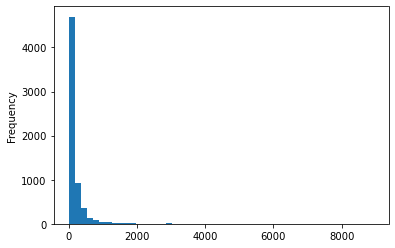

In [15]:
data_clean['reply_char_count'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

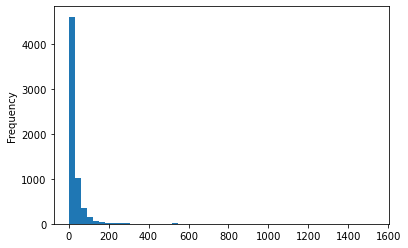

In [16]:
data_clean['reply_word_count'].plot.hist(bins=50)

Find the average replies per submission (thread)

In [17]:
data_clean.groupby(['submission_title']).reply.size().describe()

count    622.000000
mean      10.165595
std        9.971614
min        1.000000
25%        3.000000
50%        6.000000
75%       19.750000
max       67.000000
Name: reply, dtype: float64

Find the average upvotes per submission (thread)

In [18]:
data_clean[~data_clean.duplicated('submission_id')]['submission_score'].describe()

count    639.000000
mean       2.395931
std        8.022581
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      132.000000
Name: submission_score, dtype: float64

Average upvote is 2.39

Look at the top-10 most upvoted threads

In [19]:
data_clean[~data_clean.duplicated('submission_id')][['submission_id', 'submission_score', 'submission_title', 'submission_link_flair_text', 'submission_selftext']].sort_values(by='submission_score', ascending=False)[:10]

,submission_id,submission_score,submission_title,submission_link_flair_text,submission_selftext
5379,lqzsfd,132,Some doodles I drew during (and outside!) of c...,NaN,NaN
5422,lraldj,84,Today’s lecture notes ⚖️,NaN,NaN
1989,hr6yg3,64,Highlighter finally works on dark paper in the...,NaN,NaN
4956,lcp8q5,48,Notes for my Business Communication class in c...,NaN,NaN
2657,irglsp,47,Love Taking hand written programming notes 📝,NaN,NaN
597,dqmsnf,45,I love doing my homework with GoodNotes!,NaN,NaN
4906,lcn1jx,42,Structure for note taking (science subjects),NaN,Want to share my structure for note taking. Th...
3532,jv54xm,38,First time working with Goodnotes and I love i...,NaN,NaN
5395,lr8xcx,30,I wish there was an add to glossary option whe...,NaN,NaN
2039,hx6fj1,29,The reasons why Goodnotes reigns supreme over ...,Templates,NaN


Look at authors that posted the most replies

In [20]:
data_clean.groupby('reply_author').reply.size().sort_values(ascending=False)[:5]

reply_author
AutoModerator    124
XF939495xj6       29
davemacdo         24
moegnus           24
Topherho          23
Name: reply, dtype: int64

Look at the replies posted by `AutoModerator`

In [21]:
data_clean[data_clean['reply_author'] == 'AutoModerator'].head()

,submission_id,submission_score,submission_title,submission_link_flair_text,submission_selftext,reply_author,reply_body,reply_created_utc,reply,reply_char_count,reply_word_count
164,asuisg,3,Support requests do not work on safari,NaN,Thought I would call out again for support for...,AutoModerator,I did not read your argument. Due to me not re...,1622867861,I did not read your argument. Due to me not re...,360,56
256,ba2bcy,1,GoodNotes diary [ENG sub],NaN,NaN,AutoModerator,\n\nPlease remember we are here as a represent...,1622867948,Please remember we are here as a representatio...,436,67
317,byrrfc,1,Writing to text conversion?,Question - Other,Wondering if there is any other method of conv...,AutoModerator,**‘Seeking straight boy’ posts are text only.*...,1622868300,**‘Seeking straight boy’ posts are text only.*...,1144,153
504,df5glb,1,Sub-Outlines ?,NaN,Hello!\n\nSo it’s been a while now and I still...,AutoModerator,Thanks for posting! Make sure to check out the...,1622868582,Thanks for posting! Make sure to check out the...,352,41
673,e05ie7,1,Why is this app so laggy and so buggy lately?,NaN,Noticed problems with scrolling and a lot of b...,AutoModerator,Thanks for posting! Make sure to check out the...,1622868719,Thanks for posting! Make sure to check out the...,355,41


Let's see how many replies were posted by the bot

In [22]:
data_clean[data_clean['reply'].str.contains('this action was performed automatically')].shape[0]

125

Find out the top-10 most popular threads based on the number of replies

In [23]:
data_clean.groupby(['submission_title']).reply.size().sort_values(ascending=False)[:10]

submission_title
Error E001-E                                                                                                                   67
Pasting text from outside Goodnotes                                                                                            59
I keep seeing notes on here, and I thought I’d share mine. Digital note-taking has changed my life; it actually encourages!    54
Outline Shortcut?                                                                                                              50
Text typing pipe not showing up/updating to current position on mac.                                                           49
Notebook Covers                                                                                                                47
GoodNotes is the best thing ever🥰🥰🥰                                                                                            42
thinking about getting an ipad...                                        

Look at the body of the thread titled `"Pasting text from outside Goodnotes"`

In [24]:
data_clean[data_clean['submission_title'] == 'Pasting text from outside Goodnotes']['submission_selftext'].iloc[0]

'I’m curious to know would it be possible to select text from outside Goodnotes to then paste into a Goodnotes document directly? For example copying and pasting long alphanumeric passcodes from Lastpass into Goodnotes directly?'

Examine the replies to that thread

In [25]:
for reply in data_clean[data_clean['submission_title'] == 'Pasting text from outside Goodnotes']['reply']:
    print(reply)
    print('-'*100)

Of course it is! GoodNotes has text support, so you can even edit and format the text. You can either copy and paste it into your document, or open the app you want in other window and drag and drop the selected text into GoodNotes.
----------------------------------------------------------------------------------------------------
Yes.  I paste CSS code for reference into it all the time.
----------------------------------------------------------------------------------------------------
Mommy!!! 🤤
----------------------------------------------------------------------------------------------------
Did AA at West Point 2 years ago. It was like 11 days or so? 

There will be a timed layout early on. Make sure you bring everything and organize everything the way it should be. You will be given a paper on how everything should look like before then. I practiced the night before just to be safe. Seen lots of people get dropped for stupid stuff like forgetting a pen and stuff like that. Don

Some findings about this thread:
- Users were discussing the functionality of formatting the text while using the app
- Some users mentioned their price sensitivity to purchasing apps

Look at another popular thread titled `"thinking about getting an ipad..."`

In [26]:
data_clean[data_clean['submission_title'] == 'thinking about getting an ipad...']['submission_selftext'].iloc[0]

'... to take digital notes for school. i start university this fall, so I have enough time to save for the iPad Air. My only question is whether you feel that it’s worth it to take digital notes. I for one love how the layout of digital notes look and the convenience of it all.\n\nIf you could possible leave your personal experiences with switching from paper to digital notes, that would be great!'

Examine the replies to that thread

In [27]:
for reply in data_clean[data_clean['submission_title'] == 'thinking about getting an ipad...']['reply']:
    print(reply)
    print('-'*100)

I switched to digital notes during my second year of college and as such have six semesters and three years of experience with them, and I can say I GREATLY prefer them over physical notes.  The ability to search for things in-text but still have the option to draw diagrams makes them very useful.  I also like them for future reference, because I have all of the notebooks from my last three years in college and none of them from my first two, and I can access them both on my iPad and any other device which can access Google Drive.
----------------------------------------------------------------------------------------------------
That certainly sounds convenient. Knowing me, I’m Prly gonna end up buying the iPad, I just wanna hear stories from other people about this
----------------------------------------------------------------------------------------------------
I love it! It takes some time to getting used to, the writing feeling especially, but it's very practical. You can access

Some findings about this popular thread:
- Users were describing their experience with making digital notes as compared to physical notes
- The majority of replies recommended going digital due to the numerous benefits that could be enjoyed
- Some replies raised concerns about the affordability of going digital as note taking devices like iPads were considered expensive for college students
- A minority of users expressed qualified preference for using pen and paper, e.g. for brainstorming or drawing traditional art

Create a function to visualize top-30 n-grams of all replies

In [28]:
def visualize_ngram(corpus, n=1, top=30):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(corpus)
    ngrams = vectorizer.get_feature_names_out()
    freq = X.toarray().sum(axis=0)
    df_ngram = pd.DataFrame({'n-gram':ngrams, 'frequency': freq}).sort_values(by='frequency', ascending=False)
    df_plot = df_ngram.iloc[:top, :]
    plt.figure(figsize=(8,10))
    ax = sns.barplot(data=df_plot, x='frequency', y='n-gram')
    plt.title(f'n-gram of replies, n = {n}')
    plt.show()

Visualize the top-30 unigrams, bigrams, trigrams

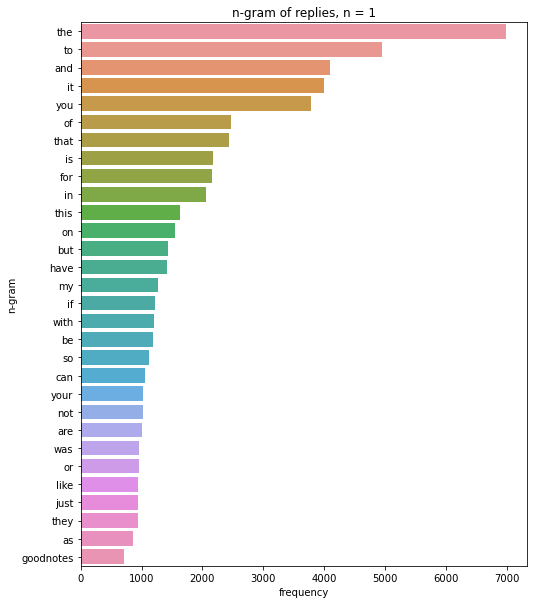

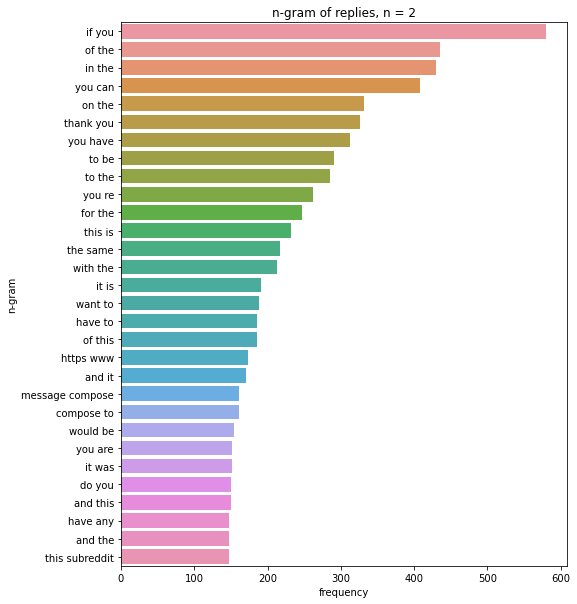

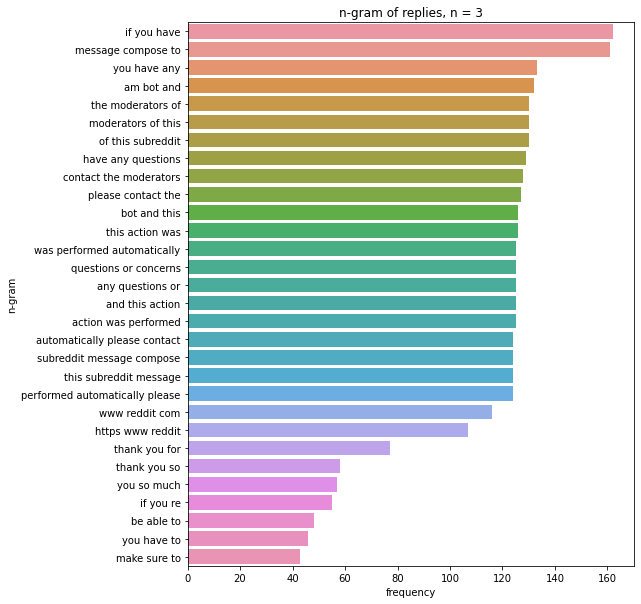

In [29]:
visualize_ngram(corpus=data_clean['reply'], n=1)
visualize_ngram(corpus=data_clean['reply'], n=2)
visualize_ngram(corpus=data_clean['reply'], n=3)

Some findings from n-grams:
- Unigrams: 
  - Quite a number of stop words like `the`, `to`, `and`, `it` are included, which do not mean anything on their own
  - `goodnotes` is in the top-30 list, which is expected since it represents the name of the app
- Bigrams and trigrams: the phrase `thank you` appear quite a bit - the redditors in this subreddit seem to be courteous and polite

Export the cleaned data as CSV

In [30]:
data_clean = data_clean.reset_index(drop=True)
data_clean.to_csv('./data/initial_eda.csv', index=False)